### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [163]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [77]:
df = df.drop(columns="Address")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [78]:
X = np.array(df.iloc[:,:-1])
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [79]:
y = np.array(df.iloc[:,-1])
y 

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [80]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [81]:
model = svr_rbf.fit(X, y)

In [82]:
print("model.score:", model.score(X, y))

model.score: 0.000449923558401899


### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez ¿hace aumentar el score? ¿por qué?

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

## PUNTO 1

In [83]:
from decimal import localcontext, Decimal, ROUND_HALF_DOWN
import matplotlib.pyplot as plt

In [84]:
with localcontext() as ctx:
    ctx.rounding = ROUND_HALF_DOWN
    for i in range(1, 15, 2):
        n = Decimal(i) / 2
        print(n, '=>', n.to_integral_value())


0.5 => 0
1.5 => 1
2.5 => 2
3.5 => 3
4.5 => 4
5.5 => 5
6.5 => 6


In [85]:
type("a")

str

In [86]:
a = df["Avg. Area Number of Bedrooms"].to_numpy().tolist()
e = []
for num in a:
    n = Decimal(num)
    n_fin = n.to_integral_value()
    i = int(n_fin)
    e.append(i)
print(np.array(e))

df["Avg. Area Number of Bedrooms"] = np.array(e)

df

[4 3 5 ... 2 5 4]


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5,42625.620156,1.198657e+06


## PUNTO 3



In [151]:
lista_X = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Area Population", "Price"]].values
l_X = np.transpose(lista_X)
l_X.shape

(5, 5000)

In [152]:
y = df["Avg. Area Number of Bedrooms"].values
y.shape

(5000,)

In [157]:
from sklearn import svm
C = 1000
gamma = 10
LL = ["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Area Population", "Price"]

# rbf -- Radial basis function
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)

for i, X in enumerate(l_X):
    X = X.reshape(-1, 1)
    clf.fit(X, y)
    print (f'Score de "{LL[i]}":', clf.score(X, y))

Score de "Avg. Area Income": 0.9998
Score de "Avg. Area House Age": 0.326
Score de "Avg. Area Number of Rooms": 0.3432
Score de "Area Population": 0.9992
Score de "Price": 0.9998


## PUNTO 4


In [159]:
X = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Area Population", "Price"]].values

In [160]:
y = df["Avg. Area Number of Bedrooms"].values

In [161]:
C = 1000
gamma = 10

clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
X = X.reshape(-1, 1)
clf.fit(X, y)
print (f'Score:', clf.score(X, y))

#No entiendo como comparar todas las X con target a la vez.

ValueError: Found input variables with inconsistent numbers of samples: [25000, 5000]

## PUNTO 5


<AxesSubplot:>

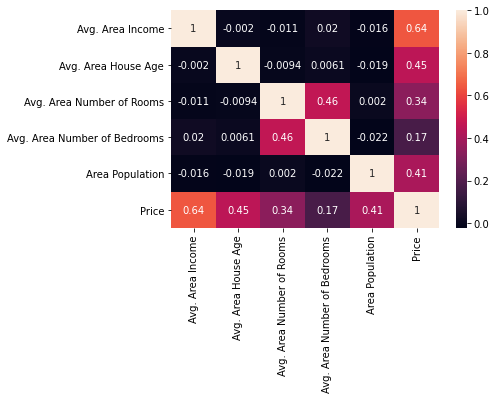

In [165]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Mejores scores: "Avg. Area Income", "Price"

#Mejor correlación: "Number of rooms"